In [272]:
import pandas as pd
import spacy
import steamreviews
import json
import csv
import os
import glob
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import wordcloud
from wordcloud import WordCloud
import re
import plotly
import seaborn as sns
import stanza

## Reviews download
https://pypi.org/project/steamreviews/

In [273]:
dir_name = "data"
reviews_jsons = glob.glob(f"{dir_name}/*")
reviews_jsons

['data\\review_1150690.json',
 'data\\review_1172620.json',
 'data\\review_1341290.json',
 'data\\review_1515210.json',
 'data\\review_210970.json',
 'data\\review_219150.json',
 'data\\review_219890.json',
 'data\\review_250320.json',
 'data\\review_257510.json',
 'data\\review_262060.json',
 'data\\review_289070.json',
 'data\\review_294100.json',
 'data\\review_304430.json',
 'data\\review_394360.json',
 'data\\review_400.json',
 'data\\review_427520.json',
 'data\\review_460950.json',
 'data\\review_550.json',
 'data\\review_620.json',
 'data\\review_632470.json',
 'data\\review_646570.json',
 'data\\review_736260.json',
 'data\\review_860510.json']

In [274]:
title_dict = {"219150": "Hotline Miami",
              "1172620" : "Sea of Thieves",
              "460950" : "Katana ZERO",
              "262060" : "Darkest Dungeon",
              "250320" : "The Wolf Among Us",
              "210970" : "The Witness",
              "620" : "Portal 2",
              "736260" : "Baba Is You",
              "219890" : "Antichamber",
              "289070" : "Sid Meier's Civilization VI",
              "427520" : "Factorio",
              "257510" : "The Talos Principle",
             "304430" : "INSIDE",
             "400" : "Portal",
             "394360" : "Hearts of Iron IV",
             "632470" : "Disco Elysium",
             "294100" : "RimWorld",
              "646570" : "Slay the Spire",
              "1150690" : "Omori",
              "1341290" : "We Were Here Forever",
              "1515210" : "The Past Within",
              "860510" : "Little Nightmares II",
              "550" : "Left 4 Dead 2"}

In [275]:
genre_dict = {"219150": "A",
              "1172620" : "A",
              "460950" : "A",
              "262060" : "R",
              "250320" : "R",
              "210970" : "P",
              "620" : "P",
              "736260" : "P",
              "219890" : "P",
              "289070" : "S",
              "427520" : "S",
              "257510" : "P",
              "304430" : "P",
             "400" : "P",
             "394360" : "S",
             "632470" : "R",
             "294100" : "S",
             "646570" : "R",
             "1150690" : "R",
             "1341290" : "P",
             "1515210" : "P",
             "860510" : "P",
             "550" : "A"}

In [276]:
data_list = []
for i in reviews_jsons:
    with open(i, encoding = "utf-8") as json_file:
        json_data = json.load(json_file)
        reviews = json_data['reviews']
        file_name = json_file.name.split('.')[0].split('_')[1]
        for key in reviews.keys():
            data_list.append([title_dict.get(file_name),genre_dict.get(file_name),reviews[key]['author']['steamid'], reviews[key]['votes_up'], 
                          reviews[key]['review'], reviews[key]['weighted_vote_score'], reviews[key]['voted_up'],
                          reviews[key]['author']['num_games_owned'], reviews[key]['author']['playtime_at_review'],
                          reviews[key]['author']['num_reviews'], 
                          reviews[key]["timestamp_created"] ])
df = pd.DataFrame(data_list, columns = ["title", "genre","steamid", "votes_up", "review", "weighted_vote_score", "voted_up",
                                        "num_games_owned", "playtime_at_review", "num_reviews", "timestamp_created"])

## Wykresy

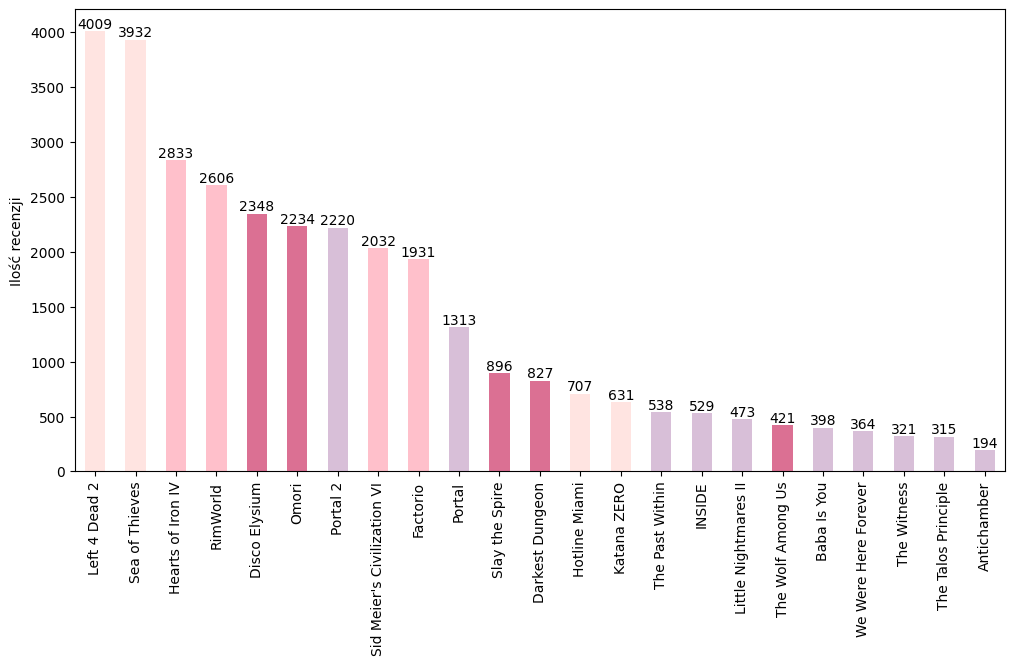

In [277]:
value_counts_title = df["title"].value_counts()
genre_colors = {"A": "mistyrose", "R": "palevioletred", "P": "thistle", "S": "pink"}
df['color'] = df['genre'].map(genre_colors)
colors = [df.loc[df['title'] == title]['color'].iloc[0] for title in value_counts_title.index]

plt.figure(figsize=(12, 6))
x = value_counts_title.plot(kind = "bar", color = colors)
plt.ylabel("Ilość recenzji")
plt.xticks(rotation = 90)
for i, count in enumerate(value_counts_title):
    x.text(i, count, count, va = "bottom", ha = "center")

plt.show()

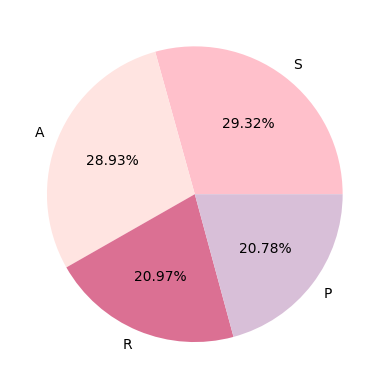

In [278]:
value_counts_genre = df["genre"].value_counts()
colors = ["pink", "mistyrose", "palevioletred", "thistle"]
x = plt.pie(value_counts_genre, labels = value_counts_genre.index, colors=colors, autopct='%1.2f%%')
plt.show()

<Figure size 1200x600 with 0 Axes>

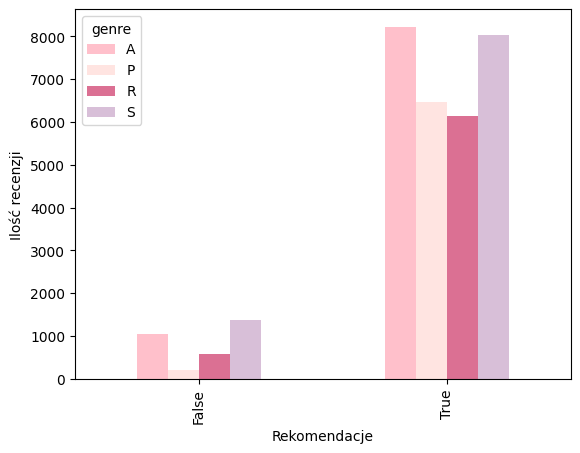

In [279]:
value_counts_recommendation_genre = df.groupby('genre').voted_up.value_counts().unstack(0)
colors = ["pink", "mistyrose", "palevioletred", "thistle"]
plt.figure(figsize=(12, 6))
x = value_counts_recommendation_genre.plot(kind = "bar", color = colors, mark_right = True)
plt.ylabel("Ilość recenzji")
plt.xlabel("Rekomendacje")
plt.show()

In [280]:
percentage_pos = value_counts_recommendation_genre.iloc[1] / (value_counts_recommendation_genre.iloc[1] + value_counts_recommendation_genre.iloc[0]) * 100 
percentage_neg = value_counts_recommendation_genre.iloc[0] / (value_counts_recommendation_genre.iloc[0] + value_counts_recommendation_genre.iloc[1]) * 100 
print(percentage_pos)
print(percentage_neg)

genre
A    88.619463
P    96.954239
R    91.465953
S    85.354180
dtype: float64
genre
A    11.380537
P     3.045761
R     8.534047
S    14.645820
dtype: float64


<Figure size 1200x600 with 0 Axes>

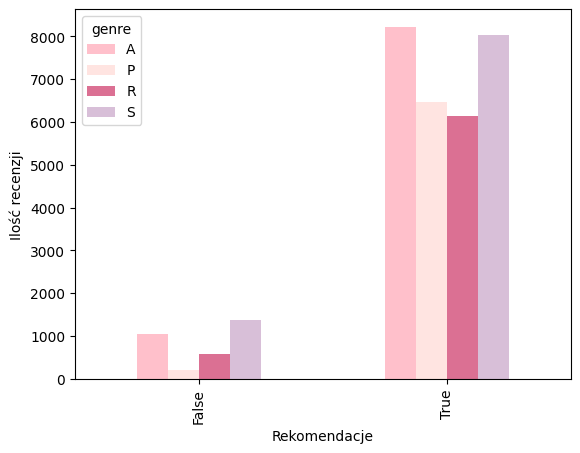

In [281]:
value_counts_recommendation_genre = df.groupby("genre").voted_up.value_counts().unstack(0)
colors = ["pink", "mistyrose", "palevioletred", "thistle"]
plt.figure(figsize=(12, 6))
x = value_counts_recommendation_genre.plot(kind = "bar", color = colors)
plt.ylabel("Ilość recenzji")
plt.xlabel("Rekomendacje")
plt.show()

In [283]:
df.sample(frac=0.3).head()

,title,genre,steamid,votes_up,review,weighted_vote_score,voted_up,num_games_owned,playtime_at_review,num_reviews,timestamp_created,color
24989,Left 4 Dead 2,A,76561197961661447,1,The one game I enjoy bhopping and getting kick...,0.519999980926513672,True,49,114036,1,1695310237,mistyrose
17955,Portal,P,76561198084385268,6,NOTE: I played The Witness\Talos games first b...,0.595959603786468506,True,4162,130,281,1693128234,thistle
17665,Hearts of Iron IV,S,76561199127933206,1,"Game crashes at random dates, try to upload an...",0.5,False,0,22689,1,1695725510,pink
2357,Sea of Thieves,A,76561198052982912,38,Player base is atrocious. We have never encoun...,0.677047073841094971,False,0,1846,10,1682109267,mistyrose
29934,Disco Elysium,R,76561198009664950,7,"This game rules. Don’t buy it. Fuck you, skinw...",0.507646799087524414,False,2674,138,328,1679061038,palevioletred


In [284]:
df['timestamp_created'] = pd.to_datetime(df['timestamp_created'], unit='s')

## Preprocessing

1. Braki danych
2. Usunięcie duplikatów
4. Usunięcie recenzjii krótszych niż 3 słowa
9. Usunięcie znaków spcjalnych 
10. "Text lowering"
6. Usunięcie znaków interpunkcyjnych i liczb
7. Tokenizacja
8. Part-of-speech tagging
9. Lematyzacja

#### Braki danych

In [88]:
df.isna().sum()

title                  0
genre                  0
steamid                0
votes_up               0
review                 0
weighted_vote_score    0
voted_up               0
num_games_owned        0
playtime_at_review     0
num_reviews            0
timestamp_created      0
color                  0
dtype: int64

#### Usunięcie duplikatów

In [89]:
df.duplicated(subset='review').sum()

2580

In [90]:
df[df.duplicated(subset='review')].sample(59)

,title,genre,steamid,votes_up,review,weighted_vote_score,voted_up,num_games_owned,playtime_at_review,num_reviews,timestamp_created,color
4735,Sea of Thieves,A,76561197973741459,1,pirates,0.523809552192687988,True,134,1272,6,2022-10-12 15:40:34,mistyrose
21551,Katana ZERO,A,76561198414964334,1,yeah,0.512289822101593018,True,113,288,39,2022-11-07 01:05:58,mistyrose
12151,RimWorld,S,76561198290082842,3,nice,0.545454561710357666,True,33,4176,4,2023-01-11 16:29:14,pink
20450,Factorio,S,76561199080413331,1,The factory must grow.,0.52173912525177002,True,0,28791,3,2023-09-13 03:54:35,pink
30228,Disco Elysium,R,76561198080296819,954,>walking home at night\n>pass a group of youth...,0.911943614482879639,True,151,2740,2,2022-03-23 00:11:41,palevioletred
27736,Portal 2,P,76561198402725949,1,portal 2,0.507042229175567627,True,40,387,23,2023-03-18 09:37:38,thistle
19049,Portal,P,76561199046600260,261,Portal is a singleplayer first-person puzzle g...,0.948056876659393311,True,0,60,1,2020-06-25 20:15:03,thistle
26046,Portal 2,P,76561198216714299,1,nice,0.525862038135528564,True,0,181,45,2023-09-14 18:27:45,thistle
16958,Hearts of Iron IV,S,76561198301777460,1,meh,0.516316473484039307,True,0,88238,2,2022-11-13 23:21:42,pink
20534,Factorio,S,76561198110738167,1,factory must grow,0.52173912525177002,True,146,3184,14,2023-01-08 01:36:00,pink


In [91]:
(df.duplicated(subset='review') == False).sum()

29492

In [92]:
df = df[df.duplicated(subset='review') == False]

In [93]:
df.duplicated(subset='review').sum()

0

#### Długość recenzji

In [94]:
df["temp_review_len"] = df["review"].apply(lambda x: x.split(" ").__len__())
df["temp_review_len"].describe()

count    29492.000000
mean        54.191984
std        135.354534
min          1.000000
25%          5.000000
50%         13.000000
75%         39.000000
max       3997.000000
Name: temp_review_len, dtype: float64

In [95]:
df[df["temp_review_len"] == df["temp_review_len"].max()]['review'].values

array(['t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y m u s t g r o w t h e f a c t o r y 

In [96]:
df[df["temp_review_len"] < 4].groupby(by=["genre"]).count()

,title,steamid,votes_up,review,weighted_vote_score,voted_up,num_games_owned,playtime_at_review,num_reviews,timestamp_created,color,temp_review_len
genre,,,,,,,,,,,,
A,1659,1659,1659,1659,1659,1659,1659,1659,1659,1659,1659,1659
P,852,852,852,852,852,852,852,852,852,852,852,852
R,798,798,798,798,798,798,798,798,798,798,798,798
S,1140,1140,1140,1140,1140,1140,1140,1140,1140,1140,1140,1140


In [97]:
df = df[df["temp_review_len"] >= 3]

In [98]:
suma = 0
for i in df["temp_review_len"]:
    suma += i

In [99]:
print("Ilość słów:", suma,
     "Ilość recenzji:", len(df["temp_review_len"]))

Ilość słów: 1593992 Ilość recenzji: 26663


In [118]:
df = df.drop(["temp_review_len"], axis=1)

### Wordcloud

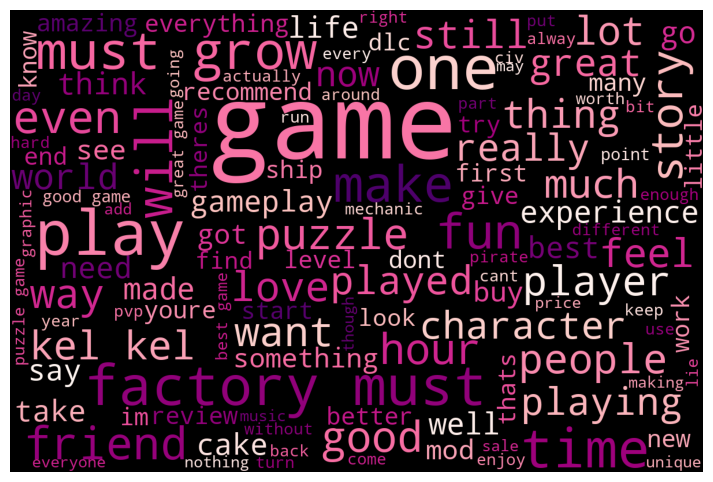

In [249]:
txt = ' '.join(i for i in df["review"])
wordcloud = WordCloud(max_font_size = 180,
                max_words = 120,
                width = 1200,
                height = 800,
                background_color = "black",
                colormap='RdPu_r').generate(txt)

plt.figure(figsize=(12,6))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

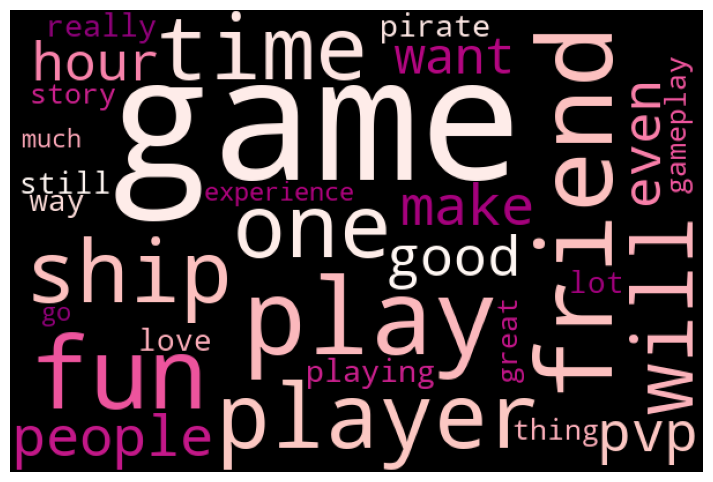

In [250]:
txt = ' '.join(i for i in df[df['genre'] == "A"]['review'])
wordcloud = WordCloud(max_font_size = 150,
                max_words = 30,
                width = 600,
                height = 400,
                background_color = "black",
                colormap='RdPu_r').generate(txt)

plt.figure(figsize=(12,6))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

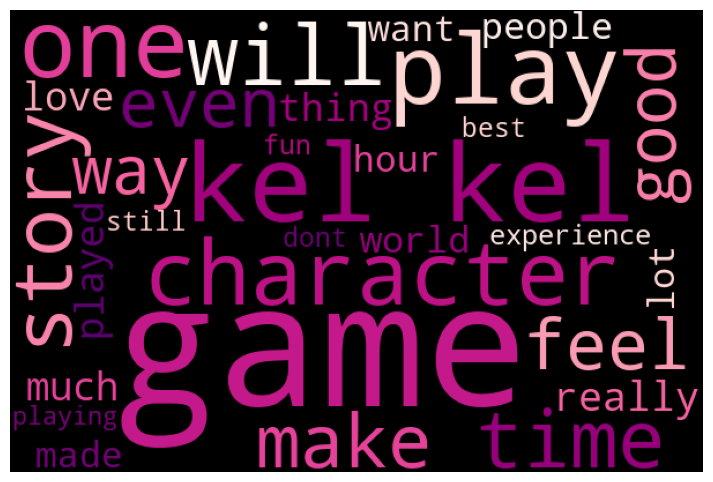

In [251]:
txt = ' '.join(i for i in df[df['genre'] == "R"]['review'])
wordcloud = WordCloud(max_font_size = 150,
                max_words = 30,
                width = 600,
                height = 400,
                background_color = "black",
                colormap='RdPu_r').generate(txt)

plt.figure(figsize=(12,6))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

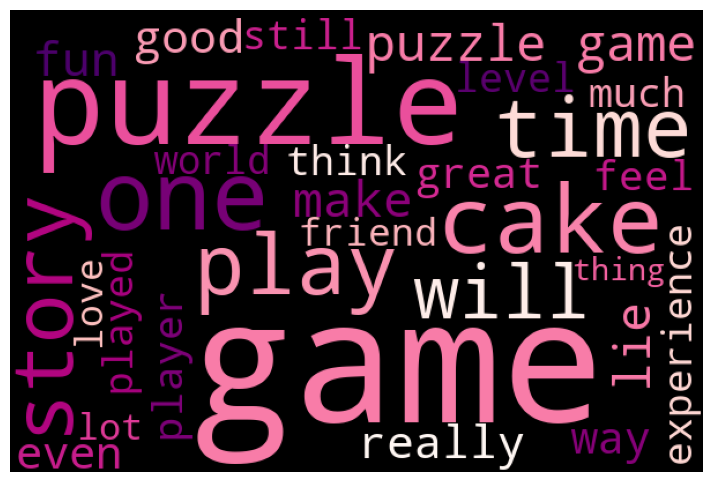

In [252]:
txt = ' '.join(i for i in df[df['genre'] == "P"]['review'])
wordcloud = WordCloud(max_font_size = 150,
                max_words = 30,
                width = 600,
                height = 400,
                background_color = "black",
                colormap='RdPu_r').generate(txt)

plt.figure(figsize=(12,6))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

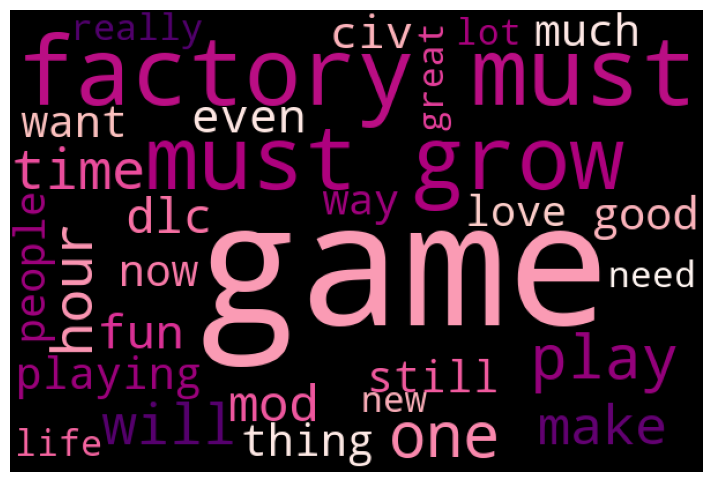

In [253]:
txt = ' '.join(i for i in df[df['genre'] == "S"]['review'])
wordcloud = WordCloud(max_font_size = 150,
                max_words = 30,
                width = 600,
                height = 400,
                background_color = "black",
                colormap='RdPu_r').generate(txt)

plt.figure(figsize=(12,6))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

#### Usunięcie znaków, text lowering

In [124]:
df["review"] = df["review"].str.replace(r"\[.*?\]|\n|[^\x00-\x7F]+", "", regex=True).str.lower()

In [125]:
df["review"].sample(10)

16747    good gamelove to play it at night to calm myse...
4866     this trash game is for deletefirst this game d...
2533       i love playing this game with a bunch of losers
17224    i first bought this game in  back then i was i...
15154      this game has killed my social life please help
28492    one of these things is not like the otherthis ...
22552    one of the best zombie shooter game i have eve...
12936    great colony sim for those looking for somethi...
16365    there are two wolves  of youone is the german ...
15908    be real who really knows how navy works just s...
Name: review, dtype: object

#### Usunięcie znaków interpunkcyjnych i liczb

In [126]:
df["review"] = df["review"].str.replace(r"[0-9]", "", regex=True)

In [127]:
import string 
df["review"] = df["review"].str.replace('['  + string.punctuation + ']', "", regex =True)

In [128]:
df["review"].sample(5)

1923                     someone get those kids in therapy
15806                               i want to kill my self
20701    could you go on sale so my friend will buy you...
24220                                   the best game ever
3334     really good looking game but can be really bor...
Name: review, dtype: object

#### Usunięcie tytułów gier z recenzji

In [129]:
for value in title_dict.values():
    df["review"] = df["review"].str.replace(value.lower(), "")

#### Tokenizacja

In [130]:
import nltk
df["tokenized"] = df["review"].apply(nltk.word_tokenize)

In [131]:
df["tokenized"].sample(15)

25401    [cool, campaigns, and, it, gets, better, with,...
27729    [one, of, the, rare, instances, where, a, sequ...
1862                          [this, game, is, incredible]
7250     [fun, puzzles, but, gets, a, bit, walking, sim...
31335    [good, programmingstyle, puzzler, i, really, l...
30186                 [what, can, i, say, except, im, gay]
7390     [i, play, this, game, when, i, lose, an, argum...
30259    [charmed, an, old, man, into, giving, me, his,...
10079    [this, game, was, great, until, the, most, rec...
14530    [graphics, you, forget, what, reality, is, bea...
12973    [perfect, waste, of, my, life, i, would, die, ...
25454                 [will, never, not, love, this, game]
19099    [set, in, an, old, and, abandoned, apple, stor...
16441    [buy, this, game, to, play, endsiegyou, realiz...
28251                [the, best, game, you, shouldnt, buy]
Name: tokenized, dtype: object

#### Stopwords

In [132]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
english_stopwords = stopwords.words('english')
english_stopwords_cleaned = [word.replace("'", "") for word in english_stopwords]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marty\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [133]:
new_column = []
for row in df["tokenized"]:
    new_row = [word for word in row if word[0] not in english_stopwords_cleaned]
    new_column.append(new_row)
df["final_review"] = new_column

#### Describe

In [162]:
df.dtypes

title                          object
genre                          object
steamid                        object
votes_up                        int64
review                         object
weighted_vote_score           float64
voted_up                         bool
num_games_owned                 int64
playtime_at_review              int64
num_reviews                     int64
timestamp_created      datetime64[ns]
color                          object
tokenized                      object
final_review                   object
dtype: object

In [163]:
df["weighted_vote_score"] = pd.to_numeric(df["weighted_vote_score"])

In [164]:
df["voted_up"] = pd.to_numeric(df["voted_up"])

In [165]:
df.describe()

,votes_up,weighted_vote_score,num_games_owned,playtime_at_review,num_reviews
count,26663.000000,26663.000000,26663.000000,2.666300e+04,26663.000000
mean,31.715148,0.570098,140.866707,1.309372e+04,21.467689
std,173.097223,0.109932,538.652824,4.720263e+04,59.809381
min,0.000000,0.500000,0.000000,5.000000e+00,1.000000
25%,1.000000,0.521739,0.000000,5.350000e+02,3.000000
50%,1.000000,0.523810,0.000000,1.800000e+03,8.000000
75%,3.000000,0.545180,113.000000,7.111500e+03,20.000000
max,9568.000000,0.987843,22780.000000,1.890626e+06,3419.000000


In [166]:
df["voted_up"]

0         True
1         True
2         True
4         True
5         True
         ...  
32066     True
32067     True
32069     True
32070    False
32071     True
Name: voted_up, Length: 26663, dtype: bool

C:\Users\marty\AppData\Local\Temp\ipykernel_19428\2159658958.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


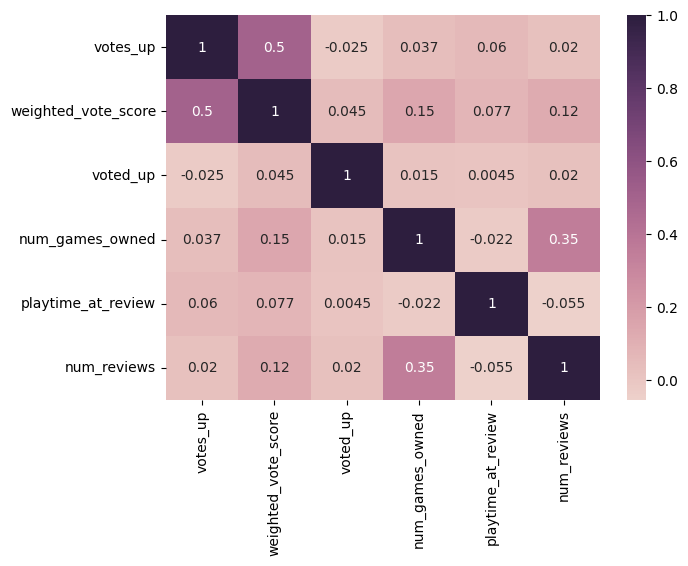

In [167]:
corr = df.corr()
plt.figure(figsize=(7,5))
sns.heatmap(corr, cmap=sns.cubehelix_palette(as_cmap=True),annot=True)
plt.show()

## Dependency parser test

In [64]:
test = [df["final_review"][6543], df["final_review"][4534], df["final_review"][12345], df["final_review"][12354],
        df["final_review"][1925], df["final_review"][1067],df["final_review"][22951],df["final_review"][2231],
       ["not","fun", "gameplay"], df["tokenized"][832], df["final_review"][21]]

In [65]:
import stanza
nlp = stanza.Pipeline('en', tokenize_pretokenized=True) 
doc = nlp(test)

2024-04-11 10:00:45 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2024-04-11 10:00:46 INFO: Downloaded file to C:\Users\marty\stanza_resources\resources.json
2024-04-11 10:00:47 INFO: Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

2024-04-11 10:00:47 INFO: Using device: cuda
2024-04-11 10:00:47 INFO: Loading: tokenize
2024-04-11 10:00:47 INFO: Loading: mwt
2024-04-11 10:00:47 INFO: Loading: pos
2024-04-11 10:00:47 INFO: Loading: lemma
2024-04-11 10:00:47 INFO: Loading: constituency
2024-04-11 10:00:48 INFO: Loading: depparse
2024-04-11 10:00:48 INFO: Loading: sentiment
2024-04-11 10:00:49 INFO: Loading: ne

In [66]:
dependency_list = []
for dependency in doc.sentences[8].dependencies:
    dependency_list.append([dependency[2].text, dependency[0].id, dependency[1]])
    
for i in range(0, len(dependency_list)):
    if (int(dependency_list[i][1]) != 0):
        dependency_list[i][1] = test[8][(int(dependency_list[i][1]) - 1)]

print(dependency_list)

[['not', 'gameplay', 'advmod'], ['fun', 'gameplay', 'amod'], ['gameplay', 0, 'root']]


In [67]:
feature_list = []
feature_opinion_list = [] 

for dependency in doc.sentences[8].dependencies:
    if dependency[2].xpos == "RB":
        opinion_word = dependency[2]
        rb_adj = dependency[0]
        
    if (dependency[2].xpos in ["NN", "NNS", "JJ", "JJS", "JJR"]) and (dependency[1] in ["amod"]):
        if dependency[0] == rb_adj or dependency[2] == rb_adj:
            if dependency[2].xpos in ["JJS", "JJR"]:
                result_dict = {'feature': dependency[0].lemma, 'opinion': opinion_word.text + " " + dependency[2].text}
            else:
                result_dict = {'feature': dependency[0].lemma, 'opinion': opinion_word.text + " " + dependency[2].lemma}     
        else:
            if dependency[2].xpos in ["JJS", "JJR"]:
                result_dict = {'feature': dependency[0].lemma, 'opinion': dependency[2].text}
            else:
                result_dict = {'feature': dependency[0].lemma, 'opinion': dependency[2].lemma}  

        feature_list.append(dependency[0].lemma)
        feature_opinion_list.append(result_dict)

print(f'Feature list: {feature_list}')
print(f'Feature-opinion list: {feature_opinion_list}')

Feature list: ['gameplay']
Feature-opinion list: [{'feature': 'gameplay', 'opinion': 'not fun'}]


## Dependency parser final

In [57]:
feature_list_column = []
feature_opinion_list_column = []

for review in df["final_review"][1722:1735]:
    if isinstance(review, list):
        review = " ".join(review)
        doc = nlp(review)
        feature_list = []
        feature_opinion_list = [] 
        
        if len(doc.sentences) == 0:
            continue
            
        for dependency in doc.sentences[0].dependencies:
            if dependency[2].xpos == "RB":
                opinion_word = dependency[2]
                rb_adj = dependency[0]
            if (dependency[2].xpos in ["JJ", "JJS"]) and (dependency[0].xpos in ["NN", "NNS"]) and (dependency[1] in ["amod"]):

                if dependency[0] == rb_adj or dependency[2] == rb_adj:
                    if dependency[2].xpos in ["JJS", "JJR"]:
                        result_dict = {'feature': dependency[0].lemma, 'opinion': opinion_word.text + " " + dependency[2].text}
                    else:
                        result_dict = {'feature': dependency[0].lemma, 'opinion': opinion_word.text + " " + dependency[2].lemma}     
                else:
                    if dependency[2].xpos in ["JJS", "JJR"]:
                        result_dict = {'feature': dependency[0].lemma, 'opinion': dependency[2].text}
                    else:
                        result_dict = {'feature': dependency[0].lemma, 'opinion': dependency[2].lemma}  

                feature_list.append(dependency[0].lemma)
                feature_opinion_list.append(result_dict)
        print(feature_opinion_list)
                
    feature_list_column.append(feature_list)
    feature_opinion_list_column.append(feature_opinion_list)

[]
[{'feature': 'undertale', 'opinion': 'earthbound'}, {'feature': 'game', 'opinion': 'great'}, {'feature': 'job', 'opinion': 'favorite'}, {'feature': 'job', 'opinion': 'great'}, {'feature': 'ending', 'opinion': 'crazy'}, {'feature': 'ending', 'opinion': 'complete'}, {'feature': 'nikki', 'opinion': 'earthbound'}, {'feature': 'part', 'opinion': 'favorite'}, {'feature': 'game', 'opinion': 'worth'}]
[]
[{'feature': 'experience', 'opinion': 'vain'}, {'feature': 'narrative', 'opinion': 'fun'}, {'feature': 'narrative', 'opinion': 'colourful'}, {'feature': 'game', 'opinion': 'psychological'}, {'feature': 'game', 'opinion': 'bright'}, {'feature': 'game', 'opinion': 'cheery'}, {'feature': 'game', 'opinion': 'flat'}, {'feature': 'everyone', 'opinion': 'comfortable'}, {'feature': 'rpg', 'opinion': 'fairly fresh'}, {'feature': 'beating', 'opinion': 'happy'}, {'feature': 'box', 'opinion': 'very unique'}, {'feature': 'hit', 'opinion': 'good'}, {'feature': 'effect', 'opinion': 'unique'}, {'feature': 

In [58]:
##"VBG", "DT"